In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

#Data

Load Data

In [ ]:
data = pd.read_csv("/content/drive/My Drive/5001/features_30_sec.csv")
data = data.iloc[0:, 2:]
print(data.shape)
data.groupby(data['label']).describe()

(1000, 58)


chroma_stft_mean            ...  mfcc20_var            
                     count      mean  ...         75%         max
label                                 ...                        
blues                100.0  0.341429  ...   84.654068  175.964890
classical            100.0  0.263542  ...  130.718639  457.233368
country              100.0  0.343812  ...   69.486013  215.641235
disco                100.0  0.415643  ...   70.659012  136.007401
hiphop               100.0  0.454319  ...   68.310675  225.773956
jazz                 100.0  0.296643  ...  126.254263  506.065155
metal                100.0  0.479235  ...   39.650540   64.298378
pop                  100.0  0.397632  ...   96.405844  258.050903
reggae               100.0  0.408247  ...   77.419569  177.675522
rock                 100.0  0.386315  ...   58.298822  148.713028

[10 rows x 456 columns]

Partitioning

In [ ]:
Y = data['label']
X = data.iloc[:,:57]
map_label = {"blues":0, "classical":1, "country":2, "disco":3, "hiphop":4, "jazz":5, "metal":6, "pop":7, "reggae":8, "rock":9}
Y = Y.map(lambda x: map_label[x])
classes=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=1)
print(Y_train.value_counts())

2    79
8    77
7    76
3    76
6    75
4    75
1    75
9    74
0    74
5    69
Name: label, dtype: int64


Normalization

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

# if normalization
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

PCA

In [ ]:
pca = PCA(n_components=20).fit(X_train)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# if PCA
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)

[0.24131946 0.1691623  0.10786729 0.07596498 0.04641935 0.03504963
 0.02862804 0.02366536 0.0230037  0.01973894 0.01827131 0.015584
 0.01368037 0.01296401 0.01171606 0.0100432  0.00895256 0.00827077
 0.00733105 0.00725788]
0.8848902617063288


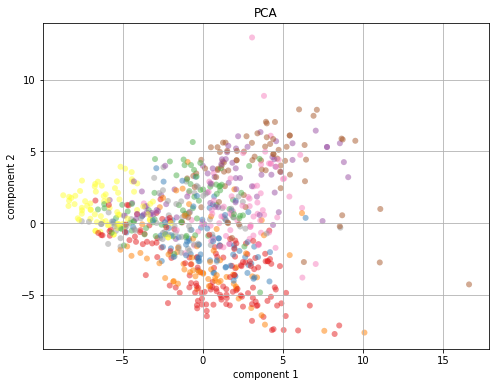

In [ ]:
#map_color = {"blues":"g", "classical":"r", "country":"deepskyblue", "disco":"darkorchid", "hiphop":"orange", "jazz":"y", "metal":"pink", "pop":"c", "reggae":"y", "rock":"coral"}
#color = list(map(lambda x: map_color[x], Y_train))
projected = pca.transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(projected[:, 0], projected[:, 1], c=plt.cm.Set1(Y_train/10), edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("PCA")
plt.grid()
plt.show()

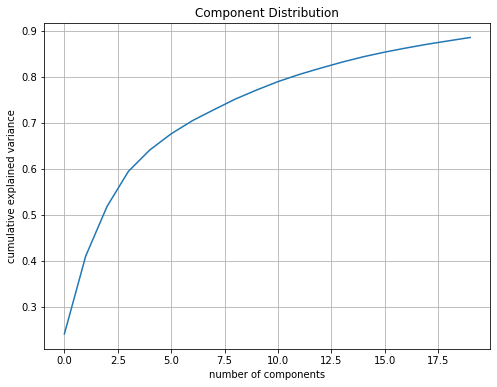

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Component Distribution')
plt.grid()
plt.show()

T-SNE

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', n_iter=20000, random_state=1)

# if t-SNE
#X_train = tsne.transform(X_train)
#X_test = tsne.transform(X_test)

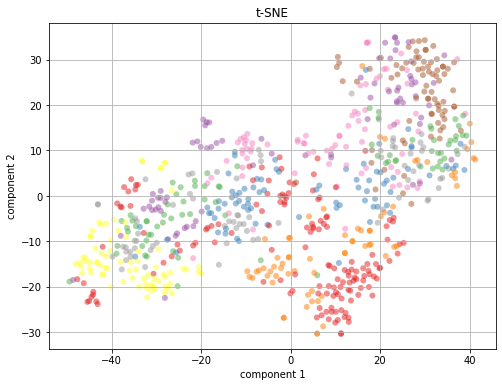

In [ ]:
result = tsne.fit_transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1], c=plt.cm.Set1(Y_train/10), edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("t-SNE")
plt.grid()
plt.show()

# Classification

In [ ]:
model = [0]*10
mname = [0]*10

0. Logistic Regression

In [ ]:
model[0] = LogisticRegression(max_iter=200)
mname[0] = 'Logistic Regression'
model[0].fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score = cross_val_score(model[0],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.69333333 0.7        0.64       0.69333333 0.72666667]
0.6906666666666667


1. KNN

In [ ]:
model[1] = KNeighborsClassifier()
mname[1] = 'KNN'
model[1].fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
score = cross_val_score(model[1],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.68666667 0.66       0.64       0.7        0.61333333]
0.6599999999999999


2. Decision Tree

In [ ]:
model[2] = DecisionTreeClassifier()
mname[2] = 'Dicission Tree'
model[2].fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
score = cross_val_score(model[2],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.54       0.47333333 0.46       0.47333333 0.54      ]
0.49733333333333335


3. Random Forest

In [ ]:
model[3] = RandomForestClassifier()
mname[3] = 'Random Forest'
model[3].fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
score = cross_val_score(model[3],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.72       0.69333333 0.64666667 0.7        0.66666667]
0.6853333333333332


4. Naive Bayes

In [ ]:
model[4] = GaussianNB()
mname[4] = 'Naive Bayes'
model[4].fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
score = cross_val_score(model[4],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.51333333 0.52666667 0.56666667 0.57333333 0.46666667]
0.5293333333333334


5. SVM (Poly)

In [ ]:
model[5] = SVC(kernel='poly')
mname[5] = 'SVM'
model[5].fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
score = cross_val_score(model[5],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.59333333 0.50666667 0.60666667 0.60666667 0.56666667]
0.576


6. SVM (RBF)

In [ ]:
model[6] = SVC()
mname[6] = 'SVM (RBF)'
model[6].fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
score = cross_val_score(model[6],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.70666667 0.69333333 0.67333333 0.75333333 0.72666667]
0.7106666666666667


7. Neural Net Work

In [ ]:
model[7] = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(256,128,64,10), max_iter=400, learning_rate_init=0.005)
mname[7] = 'Neural Net Work'
model[7].fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 128, 64, 10), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
score = cross_val_score(model[7],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.7        0.68666667 0.63333333 0.71333333 0.70666667]
0.688


8. XGBoost (Random forest)

In [ ]:
model[8] = XGBRFClassifier()
mname[8] = 'XGBoost (RF)'
model[8].fit(X_train, Y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [ ]:
score = cross_val_score(model[8],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.60666667 0.56666667 0.61333333 0.58       0.59333333]
0.592


9. XGBoost

In [ ]:
model[9] = XGBClassifier(n_estimators=500, learning_rate=0.05)
mname[9] = 'XGBoost'
model[9].fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
score = cross_val_score(model[9],X_train,Y_train,cv=5,scoring='accuracy')
print(score)
print(score.mean())

[0.70666667 0.72       0.72       0.74666667 0.71333333]
0.7213333333333333


#Evaluation

In [ ]:
pred = [0]*10
acu = [0]*10
print('-------------Accuracy-------------')
print()
for i in range(10):
  pred[i] = model[i].predict(X_test)
  acu[i] = accuracy_score(y_true=Y_test, y_pred=pred[i])
  print(mname[i] + ': ' + str(acu[i]))

-------------Accuracy-------------

Logistic Regression: 0.676
KNN: 0.656
Dicission Tree: 0.54
Random Forest: 0.688
Naive Bayes: 0.48
SVM: 0.576
SVM (RBF): 0.704
Neural Net Work: 0.672
XGBoost (RF): 0.584
XGBoost: 0.692


In [ ]:
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
  print('Confusion matrix')
  #print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)

  # We want to show all ticks...
  ax.set(xticks=np.arange(cm.shape[1]),
      yticks=np.arange(cm.shape[0]),
      xticklabels=classes, 
      yticklabels=classes,
      title='Confusion matrix',
      ylabel='True label',
      xlabel='Predicted label')
  
  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
  
  # Loop over data dimensions and create text annotations.
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  plt.show()
  return ax

Confusion matrix


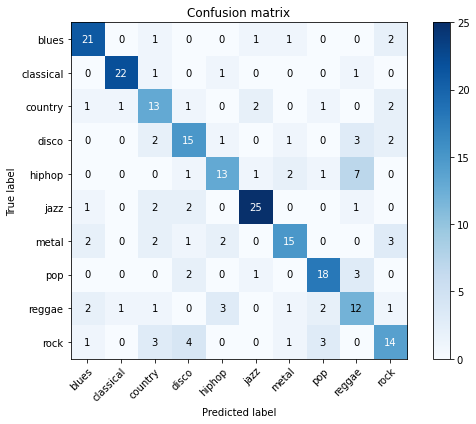

In [ ]:
cm = confusion_matrix(y_true=Y_test, y_pred=pred[7])
plot_confusion_matrix(cm)